### How do the CTD profiles at mooring sites compare to mooring data?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import nbconvert
import netCDF4 as nc4
import matplotlib.colors as mcolors
import seaborn as sns

#### Open mooring data - L3 daily averaged

In [3]:
# open Sverdrup 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
sverdrup_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019.nc")
sverdrup_ds.close()

In [4]:
# open Rink 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc")
rink_ds.close()

In [5]:
# open Fisher Islands 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
fisher_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_RinkFisher_1D_L3_2019-2020.nc')
fisher_ds.close()

In [6]:
# open Kong Oscar 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
kongoscar19 = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019.nc")
kongoscar19.close()

In [7]:
# open Kong Oscar 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
kongoscar20 = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020.nc')
kongoscar20.close()

#### Open mooring data - L2 CTD data

In [8]:
# open Kong Oscar 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019')
kong19_shal = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716754_20180825.nc")
kong19_shal.close()
kong19_deep = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716526_20180825.nc")
kong19_deep.close()

In [9]:
# open Sverdrup 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019')
sver19_shal = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716787_20180824.nc")
sver19_shal.close()
sver19_deep = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716790_20180824.nc")
sver19_deep.close()

In [10]:
# open Rink-Fisher 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019')
rink19_shal = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716788_20180826.nc")
rink19_shal.close()
rink19_deep = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716789_20180826.nc")
rink19_deep.close()

In [11]:
# open Kong Oscar 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020')
kong20_shal = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716787_20190804.nc")
kong20_shal.close()
kong20_deep = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716790_20190804.nc")
kong20_deep.close()

In [12]:
# open Rink-Fisher 2020 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020')
rink20_shal = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716754_20190805.nc")
rink20_shal.close()
rink20_deep = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_CTD_L2_03716526_20190805.nc")
rink20_deep.close()

In [13]:
# filter out spikes in datasets from iceberg drawdown
kong19_shal = kong19_shal.where(kong19_shal.flag_depth==0)
kong19_deep = kong19_deep.where(kong19_deep.flag_depth==0)

sver19_shal = sver19_shal.where(sver19_shal.flag_depth==0)
sver19_deep = sver19_deep.where(sver19_deep.flag_depth==0)

rink19_shal = rink19_shal.where(rink19_shal.flag_depth==0)
rink19_deep = rink19_deep.where(rink19_deep.flag_depth==0)

kong20_shal = kong20_shal.where(kong20_shal.flag_depth==0)
kong20_deep = kong20_deep.where(kong20_deep.flag_depth==0)

rink20_shal = rink20_shal.where(rink20_shal.flag_depth==0)
rink20_deep = rink20_deep.where(rink20_deep.flag_depth==0)

#### Open CTD data - binned

In [41]:
ship_CTD_binned_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_CTD_data/OMG_Narwhals_CTD_binned/combined')
ship_ctds_2018_ds = xr.open_dataset(ship_CTD_binned_dir / 'OMG_Narwhals_Ocean_CTD_Greenland_2018.nc')
ship_ctds_2019_ds = xr.open_dataset(ship_CTD_binned_dir / 'OMG_Narwhals_Ocean_CTD_Greenland_2019.nc')
ship_ctds_2020_ds = xr.open_dataset(ship_CTD_binned_dir / 'OMG_Narwhals_Ocean_CTD_Greenland_2020.nc')

In [43]:
# correct depths for 2018 and 2019
ship_ctds_2018_ds = ship_ctds_2018_ds.assign_coords({'depth_adjust': ship_ctds_2018_ds.depth + 33})
ship_ctds_2018_ds = ship_ctds_2018_ds.assign_coords({'pressure_adjust': ship_ctds_2018_ds.pressure + 33})

ship_ctds_2019_ds = ship_ctds_2019_ds.assign_coords({'depth_adjust': ship_ctds_2019_ds.depth + 33})
ship_ctds_2019_ds = ship_ctds_2019_ds.assign_coords({'pressure_adjust': ship_ctds_2019_ds.pressure + 33})

In [44]:
ship_ctds_2018_ds = ship_ctds_2018_ds.swap_dims({"depth":"depth_adjust"})
ship_ctds_2019_ds = ship_ctds_2019_ds.swap_dims({"depth":"depth_adjust"})

In [48]:
# sverdrup mooring: 75.5413, -58.410533
sver_ctd_ship_18 = ship_ctds_2018_ds.where(np.logical_and(ship_ctds_2018_ds.lat>75.53, ship_ctds_2018_ds.lat<75.55), drop=True)

In [49]:
sver_ctd_ship_19 = ship_ctds_2019_ds.where(np.logical_and(ship_ctds_2019_ds.lat>75.53, ship_ctds_2019_ds.lat<75.55), drop=True)

In [50]:
sver_ctd_ship_20 = ship_ctds_2020_ds.where(np.logical_and(ship_ctds_2020_ds.lat>75.53, ship_ctds_2020_ds.lat<75.55), drop=True)

In [51]:
mooring_temp18 = sverdrup_ds.temperature.sel(time='2018-08-23', method='nearest')
mooring_salt18 = sverdrup_ds.salinity.sel(time='2018-08-24', method='nearest')
mooring_temp19 = sverdrup_ds.temperature.sel(time='2019-08-03', method='nearest')
mooring_salt19 = sverdrup_ds.salinity.sel(time='2019-08-03', method='nearest')

#### Open CTD data - L2 full profile

In [14]:
ship_CTD_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_CTD_data/OMG_Narwhals_CTD_L2')

ctd_sver_2018_ds = xr.open_dataset(ship_CTD_dir / '2018/OMG_Narwhals_Ocean_CTD_L2_20180823005511.nc')
ctd_kong_2018_ds = xr.open_dataset(ship_CTD_dir / '2018/OMG_Narwhals_Ocean_CTD_L2_20180824113338.nc')
ctd_rink_2018_ds = xr.open_dataset(ship_CTD_dir / '2018/OMG_Narwhals_Ocean_CTD_L2_20180825180008.nc')

### Plot CTD data alongside mooring obs

In [52]:
sver_depth_temperature = sverdrup_ds.depth_temperature.values
sver_depth_CTD = sverdrup_ds.depth_CTD.values

In [91]:
import seaborn as sns

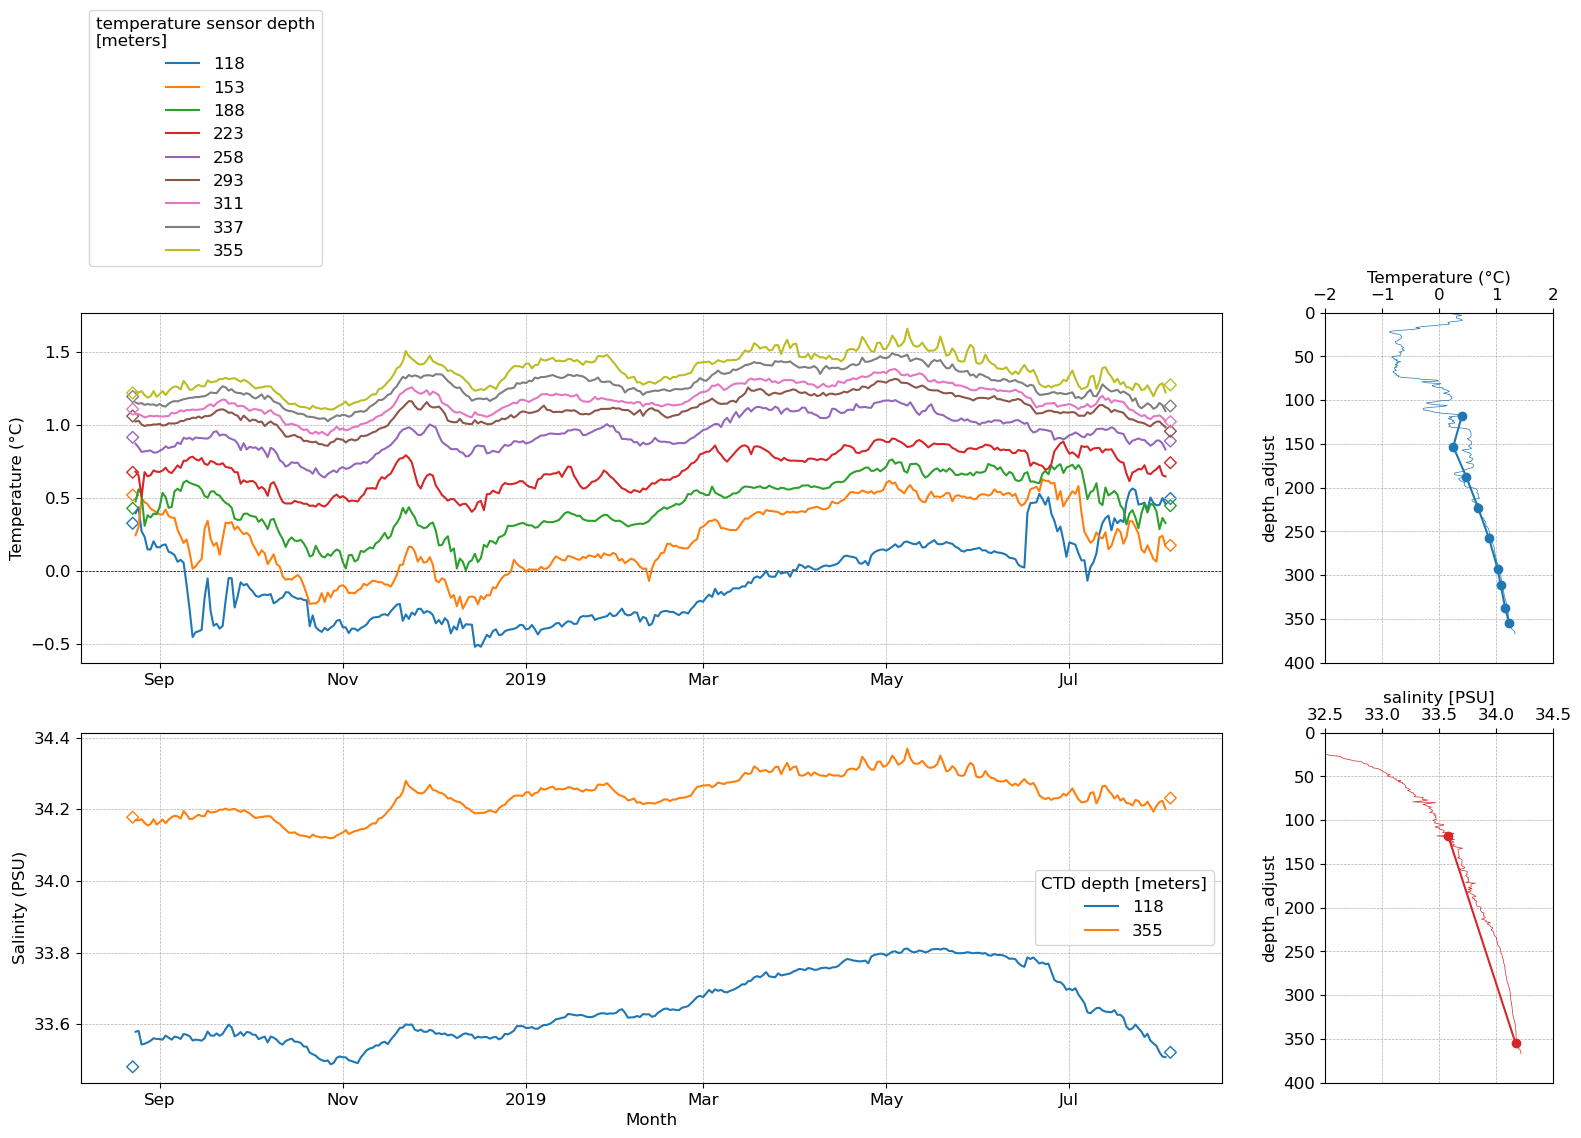

In [95]:
plt.rcParams['font.size'] = 12
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[19,10], gridspec_kw={'width_ratios': [5, 1]})
ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
abbreviations = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A','S','O','N','D',"J '20",'F','M','A','M','J','J','A','S','O']

## ----ax1 -----
colors = mcolors.TABLEAU_COLORS
# plot temperature -------------------------------------------------------------------
sverdrup_ds.temperature.plot(hue='depth_temperature', ax=ax1, add_legend=True)
all_axes = plt.gcf().get_axes()
ax = all_axes[0]
sns.move_legend(ax, loc='center left', bbox_to_anchor=(0, 1.5))
# sverdrup_ds.temperature.plot(hue='depth_temperature', ax=ax1, add_legend=False)

# add CTD observations
for i in range(len(sver_ctd_ship_18.sel(depth_adjust=sver_depth_temperature).temperature.dropna(dim='depth_adjust').depth_adjust)):
    ax1.scatter(sver_ctd_ship_18.sel(depth_adjust=sver_depth_temperature).time.values, 
                sver_ctd_ship_18.sel(depth_adjust=sver_depth_temperature).temperature.dropna(dim='depth_adjust').values[0][i], 
                marker='D',facecolors='none', edgecolor=list(colors.keys())[i])
for i in range(len(sver_ctd_ship_19.sel(depth_adjust=sver_depth_temperature).temperature.dropna(dim='depth_adjust').depth_adjust)):
    ax1.scatter(sver_ctd_ship_19.sel(depth_adjust=sver_depth_temperature).time.values, 
                sver_ctd_ship_19.sel(depth_adjust=sver_depth_temperature).temperature.dropna(dim='depth_adjust').values[0][i], 
                marker='D',facecolors='none', edgecolor=list(colors.keys())[i])
# ax1.scatter(axctds_2018_subset_ds.time.mean(), axctds_2018_subset_ds.temperature.mean(), marker='D', c='tab:red')
# ax1.scatter(axctds_2019_subset_ds.time, axctds_2019_subset_ds.temperature, marker='D',facecolors='none', edgecolor='k')
# ax1.scatter(axctds_2019_subset_ds.time.mean(), axctds_2019_subset_ds.temperature.mean(), marker='D', c='tab:red')
# ax1.scatter(axctds_2020_subset_ds.time, axctds_2020_subset_ds.temperature, marker='D',facecolors='none', edgecolor='k')
# ax1.scatter(axctds_2020_subset_ds.time.mean(), axctds_2020_subset_ds.temperature.mean(), marker='D', c='tab:red')

# ax1.set_title('Mean seasonal variation in temperature and salinity between 200-240 m')
# ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Temperature (°C)")
ax1.set_xlabel("")
# ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2019-10-05'))
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2018-09-01'))
# ax1.set_ylim(0,1.3)

## ----ax2 -----
# add CTD profiles (line plots)
sver_ctd_ship_18.temperature.plot(y='depth_adjust',hue='profile',add_legend=False, color='tab:blue',ax=ax2, linewidth=0.5)
ax2.plot(mooring_temp18.values, mooring_temp18.depth_temperature, marker='o')
# ax2.plot(mooring_temp19.values, mooring_temp19.depth_temperature, marker='o')
# axctds_2019_profile_subset_ds.temperature.plot(y='depth_adjust',hue='profile',add_legend=False, color='gray',ax=ax2, linewidth=0.5)
# axctds_2020_profile_subset_ds.temperature.plot(y='depth_adjust',hue='profile',add_legend=False, color='gray',ax=ax2, linewidth=0.5)

# fisher_temp_da_interp.sel(time='09-05-2019').plot(y='depth_adjust',ax=ax2,color='tab:olive')
# rink_temp_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax2,color='tab:green')
# KO_temp_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax2,color='tab:blue')
# KO_temp_da_interp.sel(time='09-05-2019').plot(y='depth_adjust',ax=ax2,color='tab:blue')
# sverdrup_temp_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax2,color='tab:orange')
ax2.set_xlabel('Temperature (°C)')
ax2.set_xlim(-2,2)
ax2.set_title("")
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_ylim(400,0)

## ----ax3 -----
# plot salinity -------------------------------------------------------------------
sverdrup_ds.salinity.plot(hue='depth_CTD', ax=ax3)
for i in range(len(sver_ctd_ship_18.sel(depth_adjust=sver_depth_CTD).salinity.dropna(dim='depth_adjust').depth_adjust)):
    ax3.scatter(sver_ctd_ship_18.sel(depth_adjust=sver_depth_CTD).time.values, 
                sver_ctd_ship_18.sel(depth_adjust=sver_depth_CTD).salinity.dropna(dim='depth_adjust').values[0][i], 
                marker='D',facecolors='none', edgecolor=list(colors.keys())[i])
for i in range(len(sver_ctd_ship_19.sel(depth_adjust=sver_depth_CTD).salinity.dropna(dim='depth_adjust').depth_adjust)):
    ax3.scatter(sver_ctd_ship_19.sel(depth_adjust=sver_depth_CTD).time.values, 
                sver_ctd_ship_19.sel(depth_adjust=sver_depth_CTD).salinity.dropna(dim='depth_adjust').values[0][i], 
                marker='D',facecolors='none', edgecolor=list(colors.keys())[i])
# add AXCTD observations
# ax3.scatter(axctds_2018_subset_ds.time, axctds_2018_subset_ds.salinity, marker='D',facecolors='none', edgecolor='k', label='AXCTD')
# ax3.scatter(axctds_2018_subset_ds.time.mean(), axctds_2018_subset_ds.salinity.mean(), marker='D', c='tab:red', label='AXCTD mean/yr')
# ax3.scatter(axctds_2019_subset_ds.time, axctds_2019_subset_ds.salinity, marker='D',facecolors='none', edgecolor='k')
# ax3.scatter(axctds_2019_subset_ds.time.mean(), axctds_2019_subset_ds.salinity.mean(), marker='D', c='tab:red')
# ax3.scatter(axctds_2020_subset_ds.time, axctds_2020_subset_ds.salinity, marker='D',facecolors='none', edgecolor='k')
# ax3.scatter(axctds_2020_subset_ds.time.mean(), axctds_2020_subset_ds.salinity.mean(), marker='D', c='tab:red')

ax3.set_title("")
# ax3.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax3.set_ylabel("Salinity (PSU)")
ax3.set_xlabel("Month")
ax3.grid(linestyle='--', linewidth=0.5)
# ax3.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
# ax3.legend(ncol=3,prop={'size': 13});

## ----ax4 -----
sver_ctd_ship_18.salinity.plot(y='depth_adjust',hue='profile',add_legend=False, color='tab:red',ax=ax4, linewidth=0.5)
ax4.plot(mooring_salt18.values, mooring_salt18.depth_CTD, marker='o', color='tab:red')
# ax4.plot(mooring_salt19.values, mooring_salt19.depth_CTD, marker='o')
# add CTD profiles (line plots)
# axctds_2018_profile_subset_ds.salinity.plot(y='depth_adjust',hue='profile',add_legend=False, color='gray',ax=ax4, linewidth=0.5)
# axctds_2019_profile_subset_ds.salinity.plot(y='depth_adjust',hue='profile',add_legend=False, color='gray',ax=ax4, linewidth=0.5)
# axctds_2020_profile_subset_ds.salinity.plot(y='depth_adjust',hue='profile',add_legend=False, color='gray',ax=ax4, linewidth=0.5)

# fisher_salt_da_interp.sel(time='09-05-2019').plot(y='depth_adjust',ax=ax4,color='tab:olive')
# rink_salt_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax4,color='tab:green')
# KO_salt_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax4,color='tab:blue')
# KO_salt_da_interp.sel(time='09-05-2019').plot(y='depth_adjust',ax=ax4,color='tab:blue')
# sverdrup_salt_da_interp.sel(time='09-11-2018').plot(y='depth_adjust',ax=ax4,color='tab:orange')
# ax4.set_xlabel('Salinity (PSU)')
ax4.set_xlim(32.5,34.5)
ax4.set_title("")
ax4.grid(linestyle='--', linewidth=0.5)
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
ax4.set_ylim(400,0);

# decrease some whitespace between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.2)

# plt.savefig("figures/mooring_axctd_comparison.png", bbox_inches='tight', dpi=300, facecolor='white')

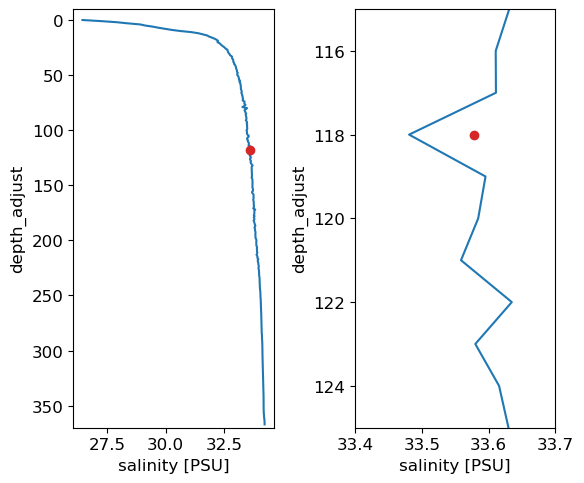

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[6,5])
sver_ctd_ship_18.salinity.plot(ax=ax1,y='depth_adjust')
ax1.plot(mooring_salt18.values[0], mooring_salt18.depth_CTD[0], marker='o', color='tab:red')
ax1.set_ylim(370,-10);
# ax1.set_xlim(33.4,33.7);
ax1.set_title("")

sver_ctd_ship_18.salinity.plot(ax=ax2,y='depth_adjust')
ax2.plot(mooring_salt18.values[0], mooring_salt18.depth_CTD[0], marker='o', color='tab:red')
ax2.set_ylim(125,115);
ax2.set_xlim(33.4,33.7);
ax2.set_title("")

plt.tight_layout()

In [60]:
sver_ctd_ship_18.sel(depth_adjust=sver_depth_CTD).salinity.values

array([[33.48087778, 34.17777778]])

In [78]:
mooring_salt18.values[0]

np.float64(33.57875565819861)

In [75]:
sver_ctd_ship_18.sel(depth_adjust=sver_depth_CTD).time.values

array(['2018-08-23T00:55:11.000000000'], dtype='datetime64[ns]')